# Samostatná práce - cvičení č. 2 (ZDO)
## Geometrické transformace

Jan Burian

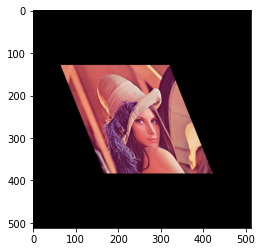

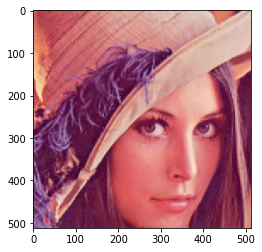

In [ ]:
import numpy as np
import skimage.io
import matplotlib.pyplot as plt

# Puvodni obrazek
lena = skimage.io.imread("https://i.stack.imgur.com/3T6Gc.jpg")

# Definice noveho obrazku (matice nul o velikosti puvodniho obrazku)
new_img = np.zeros(lena.shape).astype(np.uint8)

# Dimenze (h = height, w = width)
h, w, _ = new_img.shape

# Transformační matice - T1 a T2
T1 = np.array(
    [[2, -0.8, -25], 
     [0, 2, -256], 
     [0,   0, 1]]
)

T2 = np.array(
    [[0.5, 0, 128], 
     [0, 0.5, 128], 
     [0,   0, 1]]
)

# useful functions np.matmul(), np.round() 

def transform(mat, new_img):
    for y1 in range(h): # h = height
      for x1 in range(w): # w = width 
          pixel_cords = np.matmul(mat, np.array([x1, y1, 1])) # geometricka transformace -> nasobeni matice a vektoru => ziskani novych souradnic

          x0 = np.round(pixel_cords[0]).astype(int) # extrakce a zaokrouhleni x-ove souradnice
          y0 = np.round(pixel_cords[1]).astype(int) # extrakce a zaokrouhleni y-ove souradnice

          if ( 0 < x0 < w and 0 < y0 < h): # rozsah aby nedoslo k preteceni 
            color_RGB = lena[round(y0)][round(x0)] # vyber barvy (RGB - reprezenovano listem, napr. [5 6 8])
            new_img[y1][x1] = color_RGB # prirazeni barvy do new_img

    # Vykresleni
    plt.imshow(new_img)
    plt.show()



transform(T1, new_img.copy())
transform(T2, new_img.copy())